# PID Control
Given sensors and actuators, how can we drive a robot to reach a target location or track desired movements? Next, we will explore the basic concepts of a control system, including state-space model representation, along with open-loop and closed-loop control schemes. Importantly, we will delve into the implementation of PID control—a simple yet powerful algorithm widely used in various applications. We will examine the role of each control component through numerical simulations specifically controlling a pendulum's movement. A heuristic tuning method will be employed to determine the suitable PID parameters. 

考点一：写时间状态方程：
时间状态方程要写求导的公式
第一个写位置的导数
第二个写速度的导


$\dot{x}_1 = x_2$  
$\dot{x}_2 = -\frac{mgl}{I} \sin(x_1)-\frac{b}{I}x_2+\frac{b}{I}u$  
where $I = ml^2$.


b 是阻尼系数，II 是转动惯量（在这里为 ml2ml2），而 x2x2​ 可能是速度或角速度。因此，bIx2Ib​x2​ 表示阻尼力与速度成正比，是一个消耗能量的项，阻碍系统的运动。
bIuIb​u：这可能是外部输入或控制力，加在系统上。

考点二：写时间状态方程的输出
x_dot = f + B * u
f（位置的导数，速度的导数）+B（0,1/I）u（控制输入）

B 被定义为 np.array([0.0, 1.0 / I])np.array([0.0, 1.0 / I])。这意味着控制输入 uu 只影响状态向量的第二个分量（即角加速度）。

In [10]:
def eom_pendulum(x, u, t):
    '''
    x (1x2 vector) - state space variables (theta, theta_dot)
    u (Control)
    t time
    '''
    # System parameters
    m = 1.0
    l = 0.5
    b = 0.2
    g = 9.8
    I = m * l**2
    x1 = x[0]
    x2 = x[1]
    
    f = np.array([
        x2,
        -m * g * l * np.sin(x1) / I - b / I * x2
    ])
    #f 中存储的是系统状态空间变量的导数，即速度和角加速度
    B = np.array([0.0, 1.0 / I])
    #在这个状态空间模型中，控制输入 u 的作用是在系统的角加速度上，而不是角速度。
    #这是因为通常控制输入是施加在系统上的外部力或扭矩，它们会影响角加速度，从而改变角速度和角度。
    x_dot = f + B * u  # The outcome will be 1x2 vector
    return x_dot


In [11]:
系统突然在某一时间段产生控制
np.heaviside(x1, x2) 
当 x1 小于 0 时，np.heaviside(x1, x2) 的输出为 0。
当 x1 大于 0 时，np.heaviside(x1, x2) 的输出为 1。
当 x1 等于 0 时，np.heaviside(x1, x2) 的输出为 x2。这里的 x2 是一个可以自定义的值，通常设置为 0 或 1。

SyntaxError: invalid character '，' (U+FF0C) (2077206255.py, line 3)

In [12]:
# Task 1.3.1 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([0, 0])
x[:, 0] = x0

# Simulation loop
for idx_t in range(len(t) - 1):
    u = 3.45*np.heaviside(t[idx_t] - 2, 1.0)
    #np.heaviside(x1, x2) 
    #当 x1 小于 0 时，np.heaviside(x1, x2) 的输出为 0。
    #当 x1 大于 0 时，np.heaviside(x1, x2) 的输出为 1。
    #当 x1 等于 0 时，np.heaviside(x1, x2) 的输出为 x2。这里的 x2 是一个可以自定义的值，通常设置为 0 或 1。
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
print(f'The final angular position is {x[0, -1]:.2f} radius')

NameError: name 'np' is not defined

PID控制：
    
    比例增益（Kp）：它是系统误差（目标值与实际值之间的差）的直接倍数。比例控制部分对当前误差做出响应。Kp 增大会使系统响应更快，但过高可能导致系统过冲并引起振荡。

    积分增益（Ki）：积分控制考虑了过去的累积误差。它是误差随时间积分的函数。积分项帮助消除稳态误差，但过高的 Ki 值可能会导致系统的超调和振荡。

    微分增益（Kd）：微分控制预测系统误差的未来趋势，是误差变化率的函数。它有助于减少系统的过冲和振荡，提高系统的稳定性。较高的 Kd 值可以使系统对快速变化更敏感，但过高可能会因噪声放大而导致不稳定。

In [13]:
# Task 2.3 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([np.pi/4, 0])
x[:, 0] = x0

Kp = 10
Ki = 2
Kd = 1
target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)
error_final = target_angle-x[0,-1]
print(f'Steady-state error is {error_final}')

NameError: name 'np' is not defined

Ziegler-Nichols Method 

    首先将积分和微分增益设置为零，仅调节比例增益直到系统输出开始持续振荡（临界增益）。
    记录此时的比例增益（临界增益）和振荡周期（临界周期）。
    使用这些临界值来计算P、I和D增益。

In [14]:
# Task 3.1 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([np.pi/4, 0])
x[:, 0] = x0

Kp = 198
Ki = 0
Kd = 0
target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)

NameError: name 'np' is not defined

In [15]:
# Task 3.2 codes
# PID classic
Ku = 199
Tu = 0.25
Kp = 0.6*Ku
Ki = 1.2*Ku/Tu
Kd = 0.075*Ku*Tu

# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)

NameError: name 'np' is not defined

In [ ]:
saturation：设置最大的饱和速度

In [ ]:
# Task 4.1 codes
def control_saturation(u, sat):
    if abs(u) < sat:
        u_sat = u
    else:
        if u > 0:
            u_sat = sat
        else:
            u_sat = -sat
    return u_sat

In [ ]:
# PID control
Kp = 10
Ki = 20
Kd = 2
sat = 3
# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    u_sat = control_saturation(u, sat)
    x_dot = eom_pendulum(x[:, idx_t], u_sat, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)

In [ ]:
饱和时应该使用的PID

In [ ]:
# Task 4.3 codes
# Constants
target_angle = -np.pi/4
Kp = 10
Ki = 20
Kd = 2
Td = Kd / Kp
Ti = Kp / Ki
Tt = np.sqrt(Ti * Td)

# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

sat = 3
e_int = 0
num_sat = 0

# Initialize histories
history_u = np.zeros(x.shape[1])
history_up = np.zeros_like(history_u)
history_ui = np.zeros_like(history_u)
history_ud = np.zeros_like(history_u)
history_usat = np.zeros_like(history_u)

# Main loop
for idx_t in range(len(t) - 1):
    e_int += (-Ki * (x[0, idx_t] - target_angle) + num_sat / Tt) * dt
    #这有助于当控制器输出达到饱和限制时，减少积分误差的累积
    #e_int = e_int + (target_angle-x[0, idx_t])*dt
    up = Kp*(target_angle-x[0, idx_t])
    ui = e_int
    ud = Kd*(-x[1, idx_t])
    u = up + ui + ud
    u_sat = control_saturation(u, sat)
    num_sat = u_sat - u
    history_u[idx_t] = u
    history_up[idx_t] = up
    history_ui[idx_t] = ui
    history_ud[idx_t] = ud
    history_usat[idx_t] = u_sat
    x_dot = eom_pendulum_masschange(x[:, idx_t], u_sat, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt

plot_response(t,x,target_angle)


In [1]:
# Helper functions and packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation

---
## ✏️ Task 1.0 - System dynamics and open-loop control

Consider a forced pendulum that has the following dynamics: 
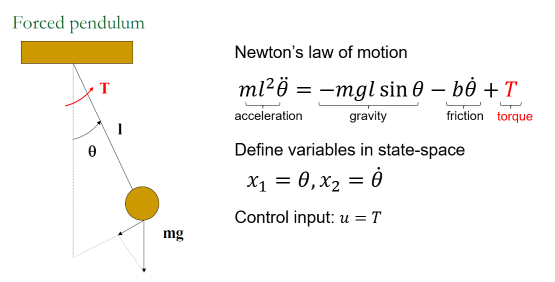

The system exhibits nonlinearity as the gravitational force exerted on the mass varies with the pendulum's angular displacement. In this system, the joint torque, denoted as T, serves as the control input to manipulate the pendulum's angular position.
是的，系统表现出非线性的原因是质点上的加速度不均衡。在这个强迫摆系统中，质点的运动受到重力的作用，但由于摆的角度变化，重力的作用也会随之变化。这导致了系统的非线性行为，因为系统的动态方程不再是简单的线性形式。非线性系统通常需要更复杂的控制策略来稳定和控制，因为系统的行为在不同状态下会发生变化。

---
### Task 1.1 State-space representation


### Task 1.1.1
Please define the state-space model forms for the forced pendulum.  
Answers:   
$\dot{x}_1 = x_2$  
$\dot{x}_2 = -\frac{mgl}{I} \sin(x_1)-\frac{b}{I}x_2+\frac{b}{I}u$  
where $I = ml^2$.


您提出的问题是正确的，力不能直接用于计算加速度。力和质量之间的关系可以用牛顿的第二定律来表示，即 F=maF=ma，其中 FF 是力，mm 是质量，aa 是加速度。但是在旋转运动中，情况略有不同。

在旋转运动中，物体的旋转惯性（惯性矩）也是一个重要因素，它影响了物体的角加速度。牛顿的第二定律不能直接应用于旋转运动，因为旋转运动涉及到角度、角速度和角加速度，而不仅仅是线性的质量和加速度。

为了将力与角加速度联系起来，我们需要考虑物体绕旋转轴的旋转惯性。根据牛顿的第二定律，力矩（或扭矩）与角加速度之间的关系可以表示为：

τ=Iατ=Iα

其中：

    ττ 是力矩（或扭矩），用于描述力在旋转运动中的效应。
    II 是物体的旋转惯性矩。
    αα 是角加速度。
    
x1​ 表示倒立摆的位置或角度，它描述了倒立摆相对于垂直位置的角度偏差。
x2x2​ 表示倒立摆的速度或角速度，它描述了倒立摆摆杆绕其轴心旋转的速度。

### Task 1.1.2
Please finish the code segments provided to compute the output of the state-space model.

In [2]:
# Task 1.1.2
# Please define the system state-space model in the following function
def eom_pendulum(x, u, t):
    '''
    x (1x2 vector) - state space variables (theta, theta_dot)
    u (Control)
    t time
    '''
    # System parameters
    m = 1.0
    l = 0.5
    b = 0.2
    g = 9.8
    I = m * l**2
    x1 = x[0]
    x2 = x[1]
    
    f = np.array([
        x2,
        -m * g * l * np.sin(x1) / I - b / I * x2
    ])
    #f 中存储的是系统状态空间变量的导数，即速度和角加速度
    B = np.array([0.0, 1.0 / I])
    #在这个状态空间模型中，控制输入 u 的作用是在系统的角加速度上，而不是角速度。
    #这是因为通常控制输入是施加在系统上的外部力或扭矩，它们会影响角加速度，从而改变角速度和角度。
    x_dot = f + B * u  # The outcome will be 1x2 vector
    return x_dot


---
### Task 1.2 Numerical simulation

Please fill in the missing parts of the following code to perform a numerical simulation and visualize the movement of the pendulum, starting from an initial angle of $\theta_0 = \pi/4$.

In [3]:
# Task 1.2 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt)   # define the time-series array
x = np.zeros((2, len(t)))  # define the array for angle and velocity

# Initial conditions
x0 = np.array([np.pi/4, 0])  # Initial angle is 45 deg. 
x[:, 0] = x0
#这里x0前面是pi/4,后面是0,所以传入x中前一行第一个（位置）是pi/4,后一行第一个（速度）是0


# Simulation loop
for idx_t in range(len(t) - 1):
    u = 0                         # the control input is set as zero to see the natural system response
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t]) # Call the state-space model defined in Task 1.1
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt  # Euler numerical integration method


In [4]:
## Visualisation of the system response: Plot the angle and angular velocity versus time (You don't need to modify this part). 
# This function takes three inputs:
# 't' is the time-series array,
# 'x' is the array containing the angle and velocity,
# 'target_angle' is a scalar representing the target position.
def plot_response(t,x,target_angle):
    plt.figure()
    plt.subplot(211)
    plt.plot(t, x[0, :])
    plt.plot(t,np.linspace(target_angle, target_angle, len(t)),linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (radians)')
    plt.title('Pendulum Angle vs. Time')

    plt.subplot(212)
    plt.plot(t, x[1, :])
    plt.plot(t,np.linspace(0, 0, len(t)),linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (radians/s)')
    plt.title('Angular Velocity vs. Time')

    plt.tight_layout()
    plt.show()  

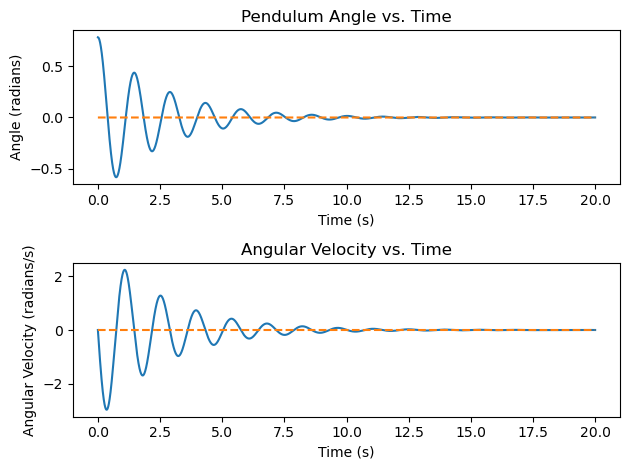

In [5]:
# Plot your simulated system response in Task 1.2
plot_response(t,x,0)

In [6]:
## Animation of the pendulum movement
## This function is to create the animation of the pendulum movement (You don't need to modify this part)
# This function takes three inputs: 
# 't' is the time-series array, 
# 'theta' is the array of angles 
# 'target_angle' is a scalar representing the target position.

##########################################################没看####################################################################################################
def animate_pendulum(t, theta, target_angle):
    # Constants
    L = 0.5  # Length of the pendulum (m)

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim(-0.6, 0.6)
    ax.set_ylim(-0.6, 0.6)

    # Initialize the pendulum line, bob, and target line
    #"bob" 是指倒立摆系统的摆锤或挂坠物体
    pendulum_line, = ax.plot([], [], 'o-', lw=2)
    pendulum_bob, = ax.plot([], [], 'ro', markersize=10)
    target_line, = ax.plot([], [], 'g--', lw=1)  # green dashed line for the target angle

    # Initialize the text object for time display
    time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

    # Function to initialize the animation
    def init():
        pendulum_line.set_data([], [])
        pendulum_bob.set_data([], [])
        target_line.set_data([], [])
        time_text.set_text('')
        return pendulum_line, pendulum_bob, target_line, time_text

    # Function to update the animation at each time step
    def update(frame):
        theta_frame = theta[frame]
        x = L * np.sin(theta_frame)
        y = -L * np.cos(theta_frame)
        pendulum_line.set_data([0, x], [0, y])
        pendulum_bob.set_data(x, y)
        time_text.set_text('Time = {:.1f}s'.format(t[frame]))
        
        # Update the target line
        target_x = L * np.sin(target_angle)
        target_y = -L * np.cos(target_angle)
        target_line.set_data([0, target_x], [0, target_y])
        
        return pendulum_line, pendulum_bob, target_line, time_text

    # Frame indices to be used (this can be adjusted for longer animations)
    frame_indices = range(0,len(t), 100)

    # Create the animation
    ani = FuncAnimation(fig, update, frames=frame_indices, init_func=init, blit=True)

    # Display the animation
    plt.title("Pendulum Animation")
    plt.xlabel("X-axis (m)")
    plt.ylabel("Y-axis (m)")
    plt.show()

    return ani

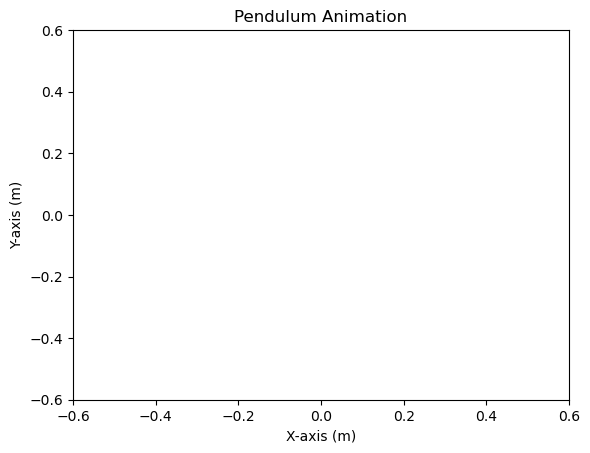

In [7]:
# Animate the pendulum movement
animate_pendulum(t, x[0,:],0)

---
### Task 1.3 Open-loop control

An open-loop controller generates motor commands without the requirement of measuring the system's current states or outputs to guide the system towards a desired performance.

---
#### Task 1.3.1 System response to a step input

The step response is the output of a system when subjected to a sudden change in input values. This change in input value can be in the form of a step function, which is a rapid change from one value to another. Please define a step-function as a control input that gives a unit input when $t=2$ second.  

In [8]:
# Task 1.3.1 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([0, 0])
x[:, 0] = x0

# Simulation loop
for idx_t in range(len(t) - 1):
    u = 3.45*np.heaviside(t[idx_t] - 2, 1.0)
    #np.heaviside(x1, x2) 
    #当 x1 小于 0 时，np.heaviside(x1, x2) 的输出为 0。
    #当 x1 大于 0 时，np.heaviside(x1, x2) 的输出为 1。
    #当 x1 等于 0 时，np.heaviside(x1, x2) 的输出为 x2。这里的 x2 是一个可以自定义的值，通常设置为 0 或 1。
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
print(f'The final angular position is {x[0, -1]:.2f} radius')

The final angular position is 0.78 radius


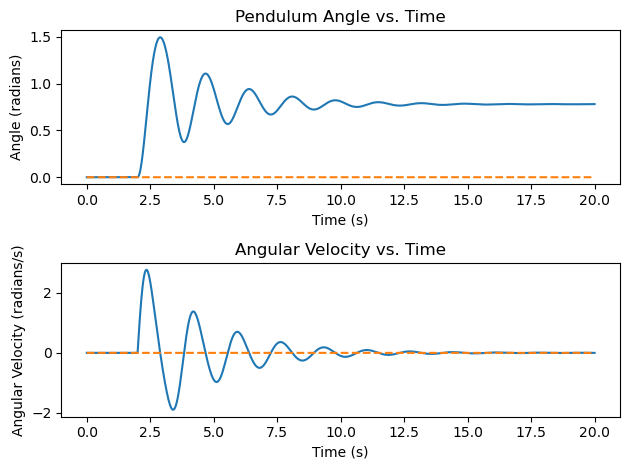

In [9]:
plot_response(t,x,0)

---
#### Task 1.3.2 

Change the amplitude of the step-function and observe the change of the final angular location. Find an amplitude of the step-function that makes the pendulum stay at approximately $45^o$.  
Answer: the amplitude of step-function is around 3.45 Nm. 


#### Task 1.3.3 
If you are designing an open-loop controller to drive the pendulum to different angles, how can you achive that according to your experiences in Task 1.3.2?   

Answer: record final angles with a range of amplitudes using a step-function, then build a mapping such as a lookup table or a regression model between the control inputs and final angles. For controlling the pendulum to a specific angle, use the established mapping to get the control amplitude.   
开环控制器（Open-Loop Controller）是一种控制系统，其中控制器的输出不受系统输出（即被控制过程的结果）的影响。在开环控制中，控制器不使用反馈来决定是否需要调整其操作。换句话说，开环控制器不监测其操作的结果。

在一个开环系统中，控制器的输入是基于预设条件或外部指令，而与系统当前状态或行为无关。因此，开环控制系统的主要特点是它们不根据输出或过程变量来调整输入。

例如，一个简单的电灯开关就是一种开环控制系统。开关的位置（开或关）完全基于用户的操作，而不考虑房间的亮度或其他因素。

---
#### Task 1.3.4 Response to a sinusoidal input

A robot now needs to pick up objects periodically on two angular locations (e.g. $\theta_1= 30^o$, $\theta_2 = -30^o$) using the pendulum. Implement a sinusoidal function as a control input ($u = A \sin(\omega t)$) and observe the system response. Complete the codes and generally describe the influence of the ampitude and frequency of the sinusoidal signals. 

In [10]:
# Task 1.3.4 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([0, 0])
x[:, 0] = x0

# Simulation loop
for idx_t in range(len(t) - 1):
    u = np.sin(14*t[idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt

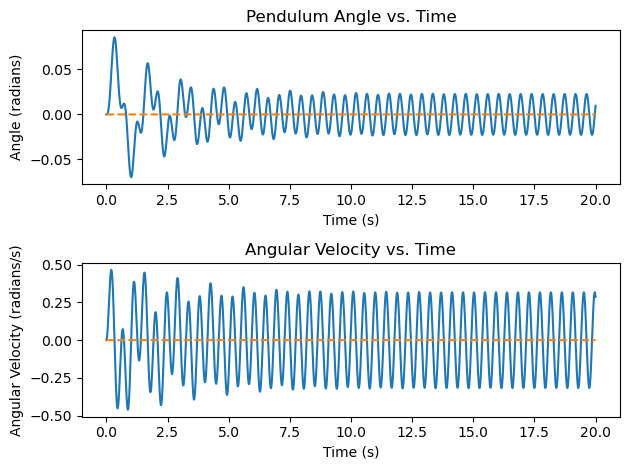

In [11]:
plot_response(t,x,0)

### Task 1.4 - STRETCH
Imagine that a robot is working on space i.e. there is no gravity (g=0), modify the system dynamics and compare the system response with previous results. 



---
---
## ✏️ Task 2.0 - Feedback control


---
### Task 2.1 P control

#### Task 2.1.1 
Please describe the concept of feedback control.   
Answer: Feedback control is a regulatory mechanism that uses measurementment information to adjust a variable in order to reach desired performance. The deviation between the variable's measured value and its desired value is called the 'error' (normally noted as $e$), which plays a crucial role in the controller's design. When there is an inverse relationship between the control input and the error, this is referred to as negative feedback control. Proportional control is a basic type of negative feedback where the control input is negatively proportional to the error i.e. $u = -Ke$. This allowes for corrective measures to be implemented to reduce the error.

#### Task 2.1.2 
Implement a P controller to guide the pendulum from an intial angle of $+45^o$ to a target angle of $-45^o$.  

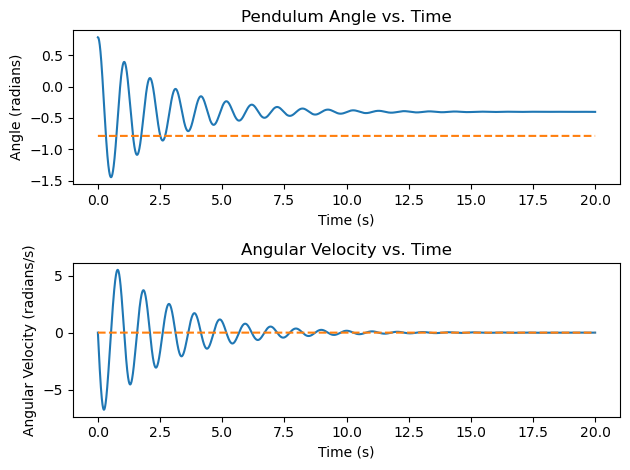

Steady-state error is -0.382828737387068


In [12]:
# Task 2.1.2 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([np.pi/4, 0])
x[:, 0] = x0

Kp = 5
#增益 KK 决定了控制器对系统误差反应的强度。增益越高，对误差的响应越强。
#增益太低可能导致系统对误差的反应不足，无法有效地纠正误差。
#增益太高可能会导致系统过于敏感，引起振荡或不稳定。
target_angle = -np.pi/4

# Simulation loop
for idx_t in range(len(t) - 1):
    u = Kp*(target_angle-x[0, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)
error_final = target_angle-x[0,-1]
print(f'Steady-state error is {error_final}')

#### Task 2.1.3     
Plot the relationship between various proportional gains on the x-axis and the corresponding steady-state errors (SSE) on the y-axis. Describe the resulting curve and provide an explanation for why the SSE does not converge to zero.

Text(0.5, 1.0, 'Steady-state Error vs. Porportion Gain')

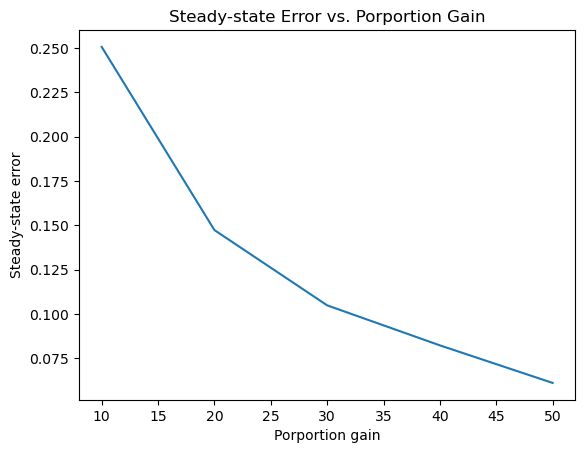

In [13]:
# Task 2.1.3 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([np.pi/4, 0])
x[:, 0] = x0

Kp_range = np.arange(10,60,10)  # Change Kp in the range of [10,60]
target_angle = -np.pi/4
SSE = np.zeros((len(Kp_range)))

# Simulation loop
for idx_Kp in range(len(Kp_range)):
    Kp = Kp_range[idx_Kp]    # Get the current Kp and 
    for idx_t in range(len(t) - 1):
        u = Kp*(target_angle-x[0, idx_t])
        x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
        x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    SSE[idx_Kp] = np.abs(target_angle-x[0, -1])#abs绝对值，x[0, -1]: 数组 x 的第一行最后一个元素，代表模拟结束时摆锤的角度
    
plt.figure()
plt.plot(Kp_range, SSE)
plt.xlabel('Porportion gain')
plt.ylabel('Steady-state error')
plt.title('Steady-state Error vs. Porportion Gain')
    

---
#### Task 2.2 PI control

Incorporate an integral control element into the controller. (Hint: consider using the summation of errors at discrete intervals with each multiplied by the time step, as a discrete approximation of the continuous integral term.)   

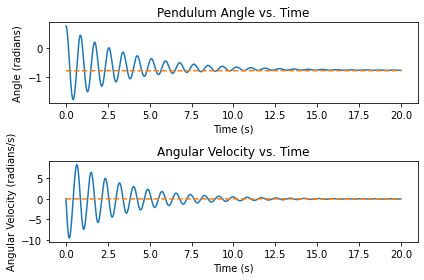

Steady-state error is -0.011556609320852673


In [63]:
# Task 2.2 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([np.pi/4, 0])
x[:, 0] = x0

Kp = 10
Ki = 2
target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)
error_final = target_angle-x[0,-1]
print(f'Steady-state error is {error_final}')

---
#### Task 2.3 PID control
Building on the PI controller, integrate a derivative component into the control system and examine the impact this has on the system's response.
    
    比例增益（Kp）：它是系统误差（目标值与实际值之间的差）的直接倍数。比例控制部分对当前误差做出响应。Kp 增大会使系统响应更快，但过高可能导致系统过冲并引起振荡。

    积分增益（Ki）：积分控制考虑了过去的累积误差。它是误差随时间积分的函数。积分项帮助消除稳态误差，但过高的 Ki 值可能会导致系统的超调和振荡。

    微分增益（Kd）：微分控制预测系统误差的未来趋势，是误差变化率的函数。它有助于减少系统的过冲和振荡，提高系统的稳定性。较高的 Kd 值可以使系统对快速变化更敏感，但过高可能会因噪声放大而导致不稳定。

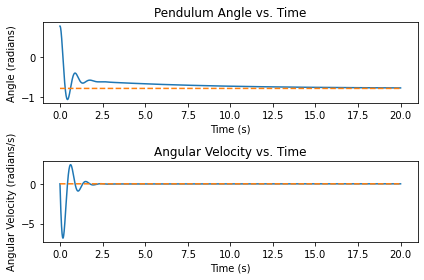

Steady-state error is -0.012475253218046878


In [64]:
# Task 2.3 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20.0  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([np.pi/4, 0])
x[:, 0] = x0

Kp = 10
Ki = 2
Kd = 1
target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)
error_final = target_angle-x[0,-1]
print(f'Steady-state error is {error_final}')

#### Task 2.4 
Analyze the performance of PI and PID controllers relative to a P controller, and provide a concise explanation for the observed differences.

Answers: 
The integral component of a PI controller helps to reduce the steady-state error (SSE) that is typically present in a system regulated by a P controller alone. Additionally, the introduction of a derivative component in a PID controller allows the system to achieve a quicker convergence toward the desired value.
    
    P控制器（比例控制器）：
        原理：仅使用比例项，即当前误差的一个倍数作为控制信号。
        特点：响应快，但通常无法完全消除稳态误差（系统输出与目标值之间持续存在的小差异）。

    PI控制器（比例-积分控制器）：
        原理：结合了比例控制和积分控制。积分项考虑了过去的累积误差，有助于消除稳态误差。
        特点：比P控制器更能有效地减少稳态误差，但可能引入一定的过冲，并且响应速度可能比纯P控制器稍慢。

    PID控制器（比例-积分-微分控制器）：
        原理：结合了比例、积分和微分控制。微分项考虑了误差变化的速率，有助于预测未来的趋势，并对快速变化作出反应。
        特点：提供最全面的控制，能够快速有效地响应系统误差的变化，减少过冲和振荡，同时消除稳态误差。

---
#### Task 2.5 - STRETCH
Plot the proportional, integral and derivative control components separately to justify your explanations in Task 2.4.


## ✏️ Task 3.0 - PID tuning: Ziegler-Nichols Method 


闭环调节方法（更常用）：

    也被称为“最终振荡法”。
    首先将积分和微分增益设置为零，仅调节比例增益直到系统输出开始持续振荡（临界增益）。
    记录此时的比例增益（临界增益）和振荡周期（临界周期）。
    使用这些临界值来计算P、I和D增益。

---
### Task 3.1 
Find the ultimate gain, at which the output of the control loop has stable and consistent oscillations.  

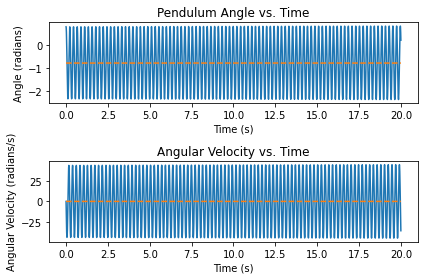

In [65]:
# Task 3.1 codes
# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

# Initial conditions
x0 = np.array([np.pi/4, 0])
x[:, 0] = x0

Kp = 198
Ki = 0
Kd = 0
target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)

---
### Task 3.2 
Determine the PID parameters using the heuristic values suggested by Ziegler–Nichols.

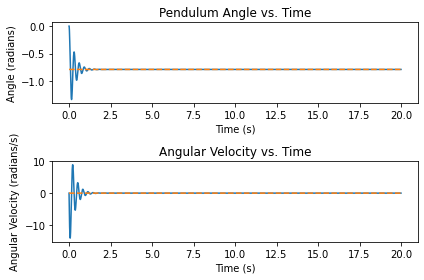

In [66]:
# Task 3.2 codes
# PID classic
Ku = 199
Tu = 0.25
Kp = 0.6*Ku
Ki = 1.2*Ku/Tu
Kd = 0.075*Ku*Tu

# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)

---
### Task 3.3  - STRETCH
Manually explore different PID parameter settings to observe their impact on system performance. ZN can often be a good basis for further manual tuning.  As there is still some oscillation/overshoot, we likely need to improve the derivative term.

Ziegler-Nichols suggested that porportional gain is 119.40, integral gain is 955.20
 and derivative gain is: 3.73



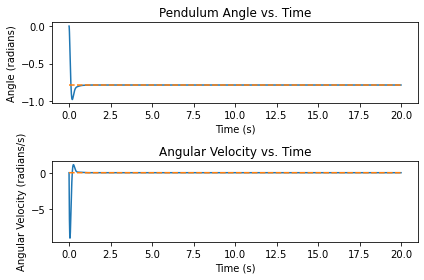

In [67]:
# Task 3.3 codes
print(f'Ziegler-Nichols suggested that porportional gain is {Kp:.2f}, integral gain is {Ki:.2f}\n and derivative gain is: {Kd:.2f}\n')
# Manually tune PID gains
Ku = 199
Tu = 0.5
Kp = 0.6*Ku
Ki = 1.2*Ku/Tu
Kd = 0.075*Ku*Tu

# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    x_dot = eom_pendulum(x[:, idx_t], u, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)

## ✏️ Task 4.0 - Stretch: Windup Phenomenon and Anti-windup Scheme


---
### Task 4.1 Actuator saturation
Implement a saturation function to limit the control input, and then simulate the system's response using these constrained inputs.

In [35]:
# Task 4.1 codes
def control_saturation(u, sat):
    if abs(u) < sat:
        u_sat = u
    else:
        if u > 0:
            u_sat = sat
        else:
            u_sat = -sat
    return u_sat

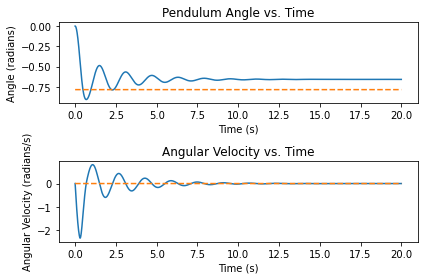

In [36]:
# PID control
Kp = 10
Ki = 20
Kd = 2
sat = 3
# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

target_angle = -np.pi/4
e_int = 0
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    u = Kp*(target_angle-x[0, idx_t]) + Ki*e_int + Kd*(-x[1, idx_t])
    u_sat = control_saturation(u, sat)
    x_dot = eom_pendulum(x[:, idx_t], u_sat, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    
plot_response(t,x,target_angle)

---
### Task 4.2 Windup phenomenon
Account for a sudden reduction to half of the mass at $t=8$ seconds due to leakage by adjusting the system dynamics accordingly, and then simulate the system's response using a saturated control input.

In [37]:
# Define the system state-space model in the following function
def eom_pendulum_masschange(x, u, t):
    if t < 8:
        m = 1
    else:
        m = 0.5
    
    l = 0.5
    b = 0.2
    g = 9.8
    I = m * l**2
    x1 = x[0]
    x2 = x[1]
    
    f = np.array([
        x2,
        -m * g * l * np.sin(x1) / I - b / I * x2
    ])
    
    B = np.array([0.0, 1.0 / I])
    x_dot = f + B * u
    return x_dot

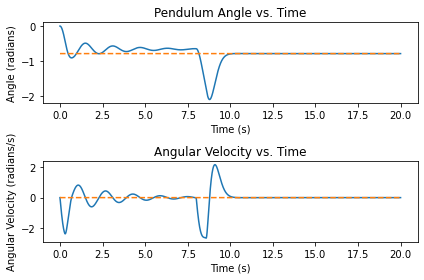

In [38]:
# PID control
Kp = 10
Ki = 20
Kd = 2
sat = 3
# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

target_angle = -np.pi/4
e_int = 0
history_up = np.zeros(np.shape(x)[1])
history_ui = np.zeros(np.shape(x)[1])
history_ud = np.zeros(np.shape(x)[1])
history_u = np.zeros(np.shape(x)[1])
history_usat = np.zeros(np.shape(x)[1])
# Simulation loop
for idx_t in range(len(t) - 1):
    e_int = e_int + (target_angle-x[0, idx_t])*dt
    #
    up = Kp*(target_angle-x[0, idx_t])
    ui = Ki*e_int
    ud = Kd*(-x[1, idx_t])
    u =  up + ui + ud
    u_sat = control_saturation(u, sat)
    x_dot = eom_pendulum_masschange(x[:, idx_t], u_sat, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt
    history_up[idx_t] = up
    history_ui[idx_t] = ui
    history_ud[idx_t] = ud
    history_u[idx_t] = u
    history_usat[idx_t] = u_sat
    
plot_response(t,x,target_angle)


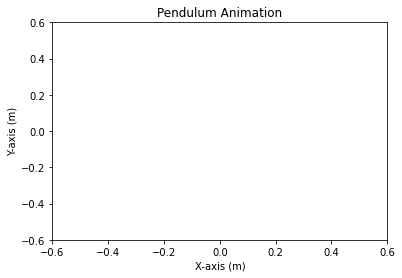

In [39]:
animate_pendulum(t, x[0,:],target_angle)

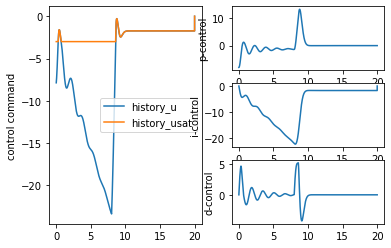

In [40]:
## Analyse the cause of windup by plotting each control component

# Create figure
plt.figure()

# First subplot occupying positions 1, 3, 5
plt.subplot(3, 2, (1, 5))
plt.plot(t, history_u, label='history_u')  # Plot history_u
plt.plot(t, history_usat, label='history_usat')  # Plot history_usat on the same subplot
plt.ylabel('control command')
plt.legend()

# Second subplot in position 2
plt.subplot(3, 2, 2)
plt.plot(t, history_up)  # Plot history_up
plt.ylabel('p-control')

# Third subplot in position 4
plt.subplot(3, 2, 4)
plt.plot(t, history_ui)  # Plot history_ui
plt.ylabel('i-control')

# Fourth subplot in position 6
plt.subplot(3, 2, 6)
plt.plot(t, history_ud)  # Plot history_ud
plt.ylabel('d-control')

# To replicate 'hold on' in MATLAB, we use 'label' in Python to differentiate between the plots
# and call plt.legend() to display the legend.

# Display all subplots
plt.show()


---
### Task 4.3 Anti-windup solution: reducing the interal control gain. 
To mitigate the windup issue, scale down the integral component in proportion to the degree of saturation in the control input.

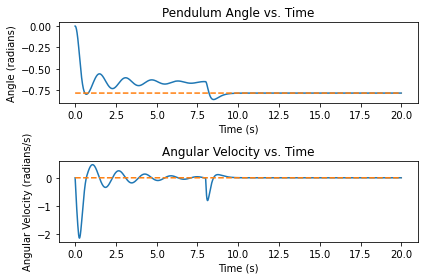

In [41]:
# Task 4.3 codes
# Constants
target_angle = -np.pi/4
Kp = 10
Ki = 20
Kd = 2
Td = Kd / Kp
Ti = Kp / Ki
Tt = np.sqrt(Ti * Td)

# Define simulation parameters
dt = 0.001 # time step
tf = 20  # simulation duration
t = np.arange(0, tf, dt) # define the time-series array
x = np.zeros((2, len(t)))

sat = 3
e_int = 0
num_sat = 0

# Initialize histories
history_u = np.zeros(x.shape[1])
history_up = np.zeros_like(history_u)
history_ui = np.zeros_like(history_u)
history_ud = np.zeros_like(history_u)
history_usat = np.zeros_like(history_u)

# Main loop
for idx_t in range(len(t) - 1):
    e_int += (-Ki * (x[0, idx_t] - target_angle) + num_sat / Tt) * dt
    #这有助于当控制器输出达到饱和限制时，减少积分误差的累积
    #e_int = e_int + (target_angle-x[0, idx_t])*dt
    up = Kp*(target_angle-x[0, idx_t])
    ui = e_int
    ud = Kd*(-x[1, idx_t])
    u = up + ui + ud
    u_sat = control_saturation(u, sat)
    num_sat = u_sat - u
    history_u[idx_t] = u
    history_up[idx_t] = up
    history_ui[idx_t] = ui
    history_ud[idx_t] = ud
    history_usat[idx_t] = u_sat
    x_dot = eom_pendulum_masschange(x[:, idx_t], u_sat, t[idx_t])
    x[:, idx_t + 1] = x[:, idx_t] + x_dot * dt

plot_response(t,x,target_angle)


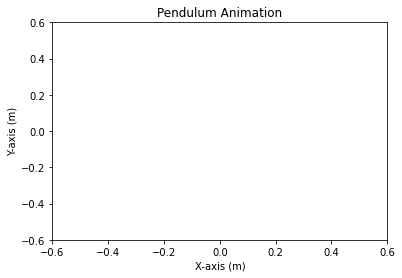

In [42]:
animate_pendulum(t, x[0,:],target_angle)